# 01 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [2]:
# Set path
path = r'C:\Users\Marce\careerfoundry\Instacart Basket Analysis'

In [3]:
# Import dataframe from pickle
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'allinone.pkl'))

In [4]:
# View all columns
pd.set_option('display.max_columns', None)

In [5]:
df.head(10)

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest/slowest days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days,freq_cust,First Name,Surname,Gender,State,Age,Join date,Dependants,fam_status,Income
0,0,2539329,1,prior,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,prior,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,prior,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,prior,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,prior,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
5,5,3367565,1,prior,6,2,7,19.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
6,6,550135,1,prior,7,1,9,20.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
7,7,3108588,1,prior,8,1,14,14.0,196,2,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
8,8,2295261,1,prior,9,1,16,0.0,196,4,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
9,9,2550362,1,prior,10,4,8,30.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
df_new =  df

In [7]:
df_new.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge',
       'price_range_loc', 'busiest day', 'busiest/slowest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prices',
       'spending_flag', 'median_days', 'freq_cust', 'First Name', 'Surname',
       'Gender', 'State', 'Age', 'Join date', 'Dependants', 'fam_status',
       'Income'],
      dtype='object')

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df_new.drop(columns = ["Unnamed: 0_x","eval_set","First Name", "Surname", "Unnamed: 0_y","_merge"], inplace=True)

In [10]:
result = []

for value in df_new["State"]:
  if value in ('Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey'):
    result.append("Northeast")
  elif value in ('Wisconsin','Michigan','Illinois','Indiana','Ohio', 'North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
   result.append("Midwest")
  elif value in ('Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
   result.append("South")
  elif value in ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
   result.append("West")

In [11]:
df_new["Region"] = result

In [12]:
df_new["Region"].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [13]:
crosstab = pd.crosstab(df_new['Region'], df_new['spending_flag'], dropna = False)

In [14]:
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,155946,7441379
Northeast,108218,5614518
South,209637,10582248
West,160316,8132597


In [15]:
#what do you call an elephant that doesn't matter?

result=[]

for value in df_new["order_number"]:
  if value < 5:
    result.append("Irrelephant")
  elif value >=5:
    result.append("Relevant")
  else:
    result.append("Problem")

In [16]:
df_new['Relevance'] = result

In [17]:
df_new['Relevance'].value_counts(dropna = False) 

Relevant       24414877
Irrelephant     7989982
Name: Relevance, dtype: int64

In [18]:
df_new.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest day', 'busiest/slowest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_prices',
       'spending_flag', 'median_days', 'freq_cust', 'Gender', 'State', 'Age',
       'Join date', 'Dependants', 'fam_status', 'Income', 'Region',
       'Relevance'],
      dtype='object')

In [19]:
#creating new dataframe with only relevant customers
df_rel = df_new[df_new["Relevance"].str.contains("Irrelephant")==False]

In [20]:
df_rel['Relevance'].value_counts(dropna = False)

Relevant    24414877
Name: Relevance, dtype: int64

In [21]:
df_rel.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'relevant.pkl' ))

In [22]:
df_rel.loc[((df_rel['Age'] >= 18) & (df_rel['Age'] <= 35) & (df_rel['Dependants'] >= 1)), 'Parent_Status'] = 'Young parent'

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [23]:
df_rel.loc[(df_rel['Dependants'] == 0), 'Parent_Status'] = 'Single adult'

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [24]:
df_rel.loc[(df_rel['Age'] >= 35) & (df_rel['Age'] <= 60) & (df_rel['Dependants'] >= 1), 'Parent_Status'] = 'Middle age parent'

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [25]:
df_rel.loc[(df_rel['Age'] >= 60) & (df_rel['Dependants'] >= 1), 'Parent_Status'] = 'Older parent'

C:\Users\Marce\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [26]:
df_rel["Parent_Status"].value_counts(dropna = False)

Middle age parent    7190133
Older parent         6241386
Single adult         6105002
Young parent         4878356
Name: Parent_Status, dtype: int64

<AxesSubplot:>

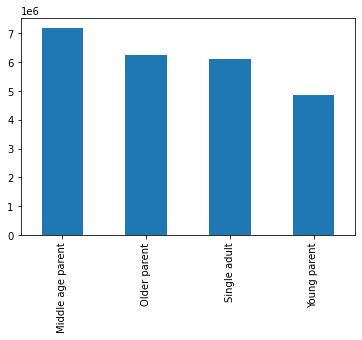

In [27]:
df_rel['Parent_Status'].value_counts().plot.bar()

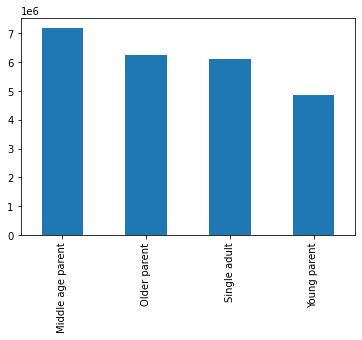

In [28]:
bar=df_rel['Parent_Status'].value_counts().plot.bar()

In [29]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_status.png'))

In [30]:
df_rel.groupby('Region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
Region                            
Midwest    12.901029  1.0  99999.0
Northeast  11.290229  1.0  99999.0
South      12.077412  1.0  99999.0
West       10.897110  1.0  99999.0

In [31]:
df_rel.groupby('Region').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                            mean  min   max
Region                                     
Midwest                10.175677  0.0  30.0
Northeast              10.050167  0.0  30.0
South                  10.084805  0.0  30.0
West                   10.027432  0.0  30.0